In [5]:
#Importing required libraries

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import math
np.random.seed(445)

In [6]:
dataframe=read_csv("Asteroid_Updated.csv", encoding="utf8")
dataframe

C:\Users\kebab\AppData\Local\Temp\ipykernel_6272\3001672724.py:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=read_csv("Asteroid_Updated.csv", encoding="utf8")


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [7]:
#First, we need to do a regression and find out what all the columns represent.

# a – Semi-major axis is the radius of the longest diameter.

# e – Orbital eccentricity represents the deviation of the orbital path from a perfect circle. It can have a value from 0 to 1, where 0 corresponds to a perfect circle.

# i – Inclination with respect to the x–y ecliptic plane represents the tilt of the body in relation to the body it orbits.

# om – Longitude of ascending node represents the angle between the reference path (the path of the body around which the asteroid orbits) to the ascending node.

# w – Argument of perihelion. Perihelion is the point on the orbit where the distance between the asteroid and the orbiting body is the smallest. The argument of perihelion represents the angle between the reference plane and the perihelion.

# q – Perihelion distance. The minimum distance at the perihelion point.

# ad – Aphelion distance (au). Aphelion is opposite to perihelion, i.e., the point where the distance between the asteroid and the orbiting body is maximal.

# per_y – Orbital period. The time it takes for the asteroid to complete one orbit around the body.

# H – Absolute Magnitude parameter. Represents the size of the body when observed from a distance of 32.6 light-years.

# neo – Near Earth object. Indicates whether the body is near Earth or not.

# pha – Physically hazardous asteroid.

# moid – Earth Minimum Orbit Intersection Distance. Represents the minimum distance between two orbits, in this case, the Earth's orbit and the asteroid's orbit.

# n – Mean motion (deg/d). Rotational speed of the body.

# per – Orbital period (d). The time it takes for the body to complete one rotation.

# ma – Mean anomaly (deg) [Reference: https://en.wikipedia.org/wiki/Mean_anomaly]

# abledo – How much light is reflected from a body.



# Our task is to create a model that predicts pha (Physically Hazardous Asteroid) based on other data.


<class 'pandas.core.frame.DataFrame'>
Index: 802207 entries, 0 to 839713
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   n       802207 non-null  float64
 1   per     802207 non-null  float64
 2   per_y   802207 non-null  float64
dtypes: float64(3)
memory usage: 24.5 MB


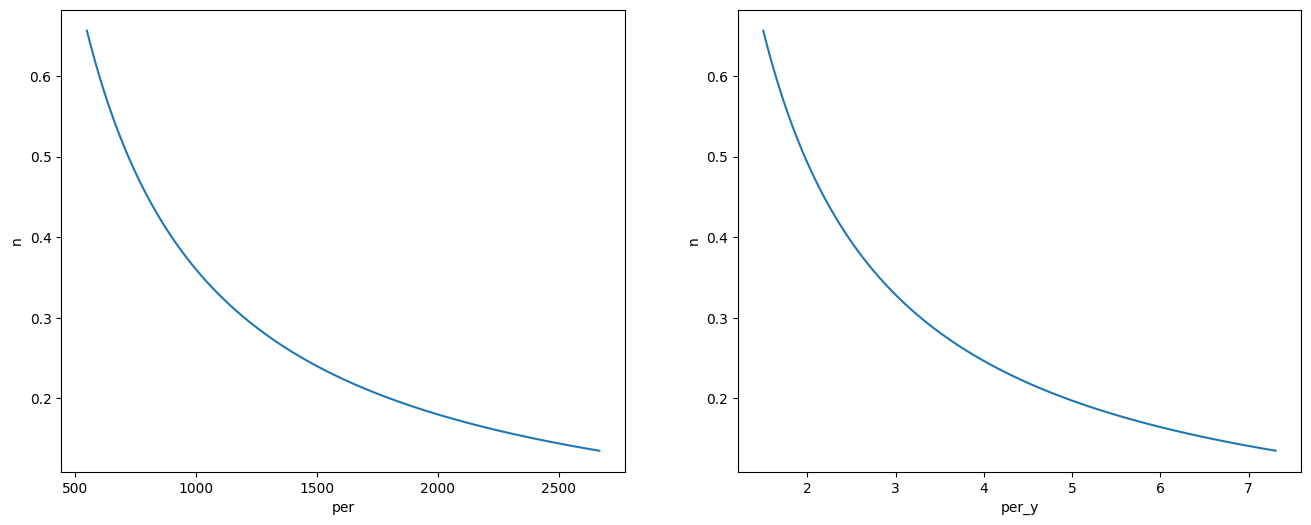

In [8]:
#We begin the work by deleting unnecessary columns.

#https://en.wikipedia.org/wiki/Mean_motion

# n - Mean motion: The speed at which the body orbits or revolves around another body.
# per, per_y - Orbital period: The time it takes for the body to complete one orbit around the orbiting body.


#By researching the terms in the dataset, we conclude that there is a correlation between the variables n, per, and per_y. 
#The same can be observed in the graph generated by the following code.



dataframe2=(dataframe[["n","per","per_y","pha"]]).dropna()
dataframe2=dataframe2.drop("pha",axis=1)

dataframe2 = dataframe2.astype(float)

fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

x = np.quantile(dataframe2['per'], [0,0.25,0.5,0.75,1])
maxY=x[3]+1.5*(x[3]-x[1])
minY=x[1]-1.5*(x[3]-x[1])
dataframe2=dataframe2[dataframe2["per"]>minY]
dataframe2=dataframe2[dataframe2["per"]<maxY]

x = np.quantile(dataframe2['per_y'], [0,0.25,0.5,0.75,1])
maxY=x[3]+1.5*(x[3]-x[1])
minY=x[1]-1.5*(x[3]-x[1])
dataframe2=dataframe2[dataframe2["per_y"]>minY]
dataframe2=dataframe2[dataframe2["per_y"]<maxY]

dataframe2.info()

sns.lineplot(data=dataframe2, x="per", y="n",ax=axes[0])
sns.lineplot(data=dataframe2, x="per_y", y="n",ax=axes[1])

# For the meteor's danger assessment, the speed at which the meteor is moving is crucial.
# Since the speed is correlated with per_y and per, we decide to drop these columns.

dataframe=dataframe.drop("per",axis=1)
dataframe=dataframe.drop("per_y",axis=1)

In [9]:
#We are removing columns that cannot influence the final outcome (codes, colors, names).

dataframe=dataframe.drop("data_arc",axis=1)
dataframe=dataframe.drop("condition_code",axis=1)
dataframe=dataframe.drop("n_obs_used",axis=1)
dataframe=dataframe.drop("extent",axis=1)
dataframe=dataframe.drop("rot_per",axis=1)
dataframe=dataframe.drop("GM",axis=1)
dataframe=dataframe.drop("BV",axis=1)
dataframe=dataframe.drop("UB",axis=1)
dataframe=dataframe.drop("IR",axis=1)
dataframe=dataframe.drop("spec_B",axis=1)
dataframe=dataframe.drop("spec_T",axis=1)
dataframe=dataframe.drop("G",axis=1)
dataframe=dataframe.drop("class",axis=1)
dataframe=dataframe.drop("name",axis=1)

In [10]:
#Now we are removing NA values
#We are printing all NA values with the following command:
dataframe.isnull().sum()

a                2
e                0
i                0
om               0
w                0
q                0
ad               6
H             2689
neo              6
pha          16442
diameter    702078
albedo      703305
moid         16442
n                2
ma               8
dtype: int64

<Axes: xlabel='albedo', ylabel='H'>

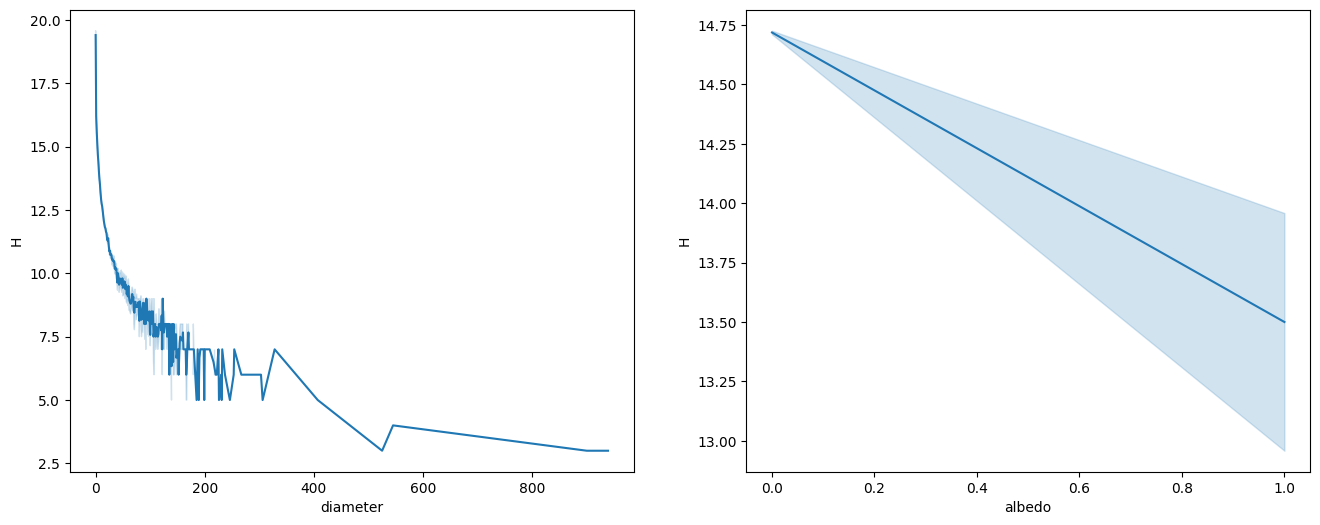

In [11]:
#Biggest problems are columns diameter and albedo which have more that 90% NA values.
#We could remove them but lets first do a research and see if they can be used for finding other NA values.


#After doing some research, we have found the following information:
#https://en.wikipedia.org/wiki/Absolute_magnitude 
#https://cneos.jpl.nasa.gov/tools/ast_size_est.html
#https://cneos.jpl.nasa.gov/about/neo_groups.html

#These sites suggest that there is correlation between the columns:

# H – Absolute Magnitude parameter. Represents the size of the body as if the body were observed from a distance of 32.6 light years.
# diameter - the diameter of the body.
# albedo: How much light is reflected from a body.

#Let's make a graph to test these assumptions.

dataframe2=dataframe.dropna()
dataframe2=dataframe2.drop("pha",axis=1)
dataframe2=dataframe2.drop("neo",axis=1)
dataframe2 = dataframe2.astype(float)
dataframe2 = dataframe2.astype(int)

fig, axes = plt.subplots(figsize=(16, 6),ncols=2)


sns.lineplot(data=dataframe2, x="diameter", y="H",ax=axes[0])
sns.lineplot(data=dataframe2, x="albedo", y="H",ax=axes[1])

In [ ]:

#Based on the graph above, we determine that there is a dependency between
#diameter, H (Absolute magnitude parameter), and albedo. 
#This would allow us to fill in the missing values in the diameter column. 
#However, this is not possible because all columns with missing values for diameter also have missing values for albedo. 
#Therefore, we are forced to delete the diameter and albedo columns. 
#We will use H because it has the greatest impact on the asteroid's diameter, as can be seen from the table and the formula at https://cneos.jpl.nasa.gov/tools/ast_size_est.html."

In [ ]:
#Filling in the NA values in the H column using a formula.

def transformisi(x):
    if(pandas.isna(x["H"])):
        if not (pandas.isna(x["diameter"])):
            if not (pandas.isna(x["albedo"])):
                x.loc["H"]=-((-3.1236*math.log(10)+(math.log((x.loc["diameter"]**2)*x.loc["albedo"])/2))/(0.2*math.log(10)))
                   
        
    return x
dataframe=dataframe.transform(lambda x:transformisi(x),axis=1)
len(dataframe[pandas.isna(dataframe["H"])])

#We delete and drop the remaining values of H that we cannot calculate and also drop the diameter and albedo columns.

dataframe=dataframe.drop("diameter",axis=1)
dataframe=dataframe.drop("albedo",axis=1)


In [ ]:
#For PHA (Potentially Hazardous Asteroids), we cannot fill in the missing values, so we delete them.
dataframe=dataframe.dropna(subset=['pha'])

In [ ]:
dataframe.isnull().sum()

In [ ]:
#Since there are a few remaining NA values, we will drop them.
dataframe=dataframe.dropna()
dataframe.info()